**Notes by Prathamesh Joshi:**

```sql
-- Even numbers
select id, name from AREALOCAITON
WHERE id IN (select id from AREALOCATION Where ID%2 = 0)

-- TYPES OF TRIANGLES

-- TRUNCATE, FLOOR, CEIL, BETWEEN, ROUND, REPLACE, TRIM, As_type

select count(NAME) FORM CITY where POPULATION > 100000

select sum(Population) AS tot_pop from CITY where District= 'California'

-- Min, Max, Average, 

select ceil(avg((salary - cast(replace(cast(salary as char), '0', '') as UNSIGNED) )))
from Employees

-- regular expressions ^   .*   $

-- finding median

-- rank order by power over

-- Derived Tables/ sub queries, derived columns

```

<font color = 'yellow'> %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

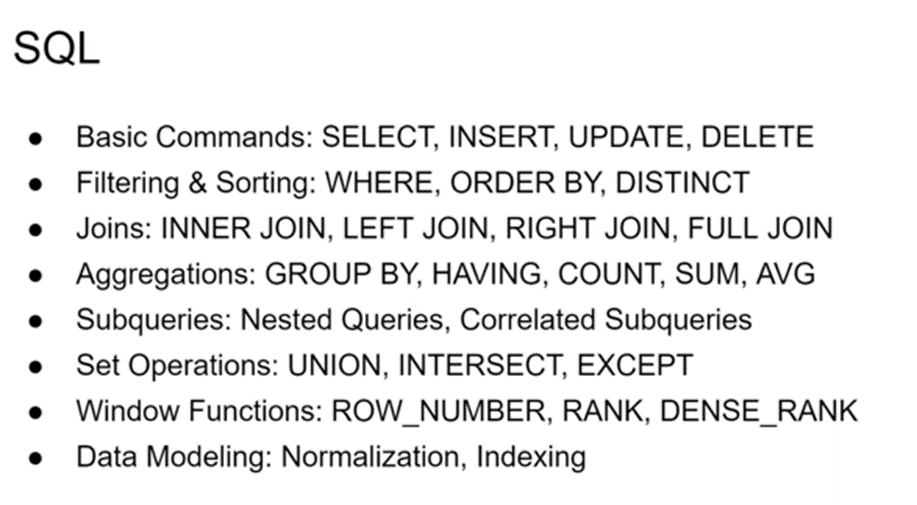

Here’s a query for each SQL concept mentioned in the image:

### DQL Basic Commands
1.   
   ```sql
   SELECT name, age FROM employees;
   ```

### Sorting & Filtering
2. 
   ```sql
   ORDER BY age DESC;
   ```
1.  
   ```sql
   WHERE age > 30;
   ```

3. **DISTINCT**:  
   ```sql
   SELECT DISTINCT department FROM employees;
   ```

### Joins
1. **Aliasing Tables**
1. **INNER JOIN**,  **LEFT JOIN**,  **RIGHT JOIN**, **FULL JOIN**
   ```sql
   SELECT e.name, d.department_name 
   FROM employees e
   INNER JOIN departments d ON e.department_id = d.department_id;
   ```

### Text & Other Operations

### Aggregations
1. **Aliasing Columns**
1. **GROUP BY**, **HAVING**:  
   ```sql
   SELECT department, COUNT(*) as total_count
   FROM employees 
   GROUP BY department
   HAVING SUM(salary) > 5;
   ```

3. **COUNT**:  
   ```sql
   SELECT COUNT(*) FROM employees;
   ```
4. **SUM**, **AVG, MIN, MAX**:  
   ```sql
   SELECT SUM(salary) FROM employees;
   ```
   
### Type cast, Replace

### Subqueries
1. **Nested Query**:  
   ```sql
   SELECT * FROM employees 
   WHERE salary > (SELECT AVG(salary) FROM employees);
   ```
2. **Correlated Subquery**:  
   ```sql
   SELECT e1.name, e1.salary 
   FROM employees e1 
   WHERE salary > (SELECT AVG(e2.salary) FROM employees e2 WHERE e2.department = e1.department);
   ```



   ```

### Set Operations
1. **UNION**:  
   ```sql
   SELECT name FROM employees WHERE department = 'HR'
   UNION
   SELECT name FROM employees WHERE department = 'Finance';
   ```
2. **INTERSECT**:  
   ```sql
   SELECT name FROM employees WHERE department = 'HR'
   INTERSECT
   SELECT name FROM employees WHERE age > 30;
   ```
3. **EXCEPT**:  
   ```sql
   SELECT name FROM employees WHERE department = 'HR'
   EXCEPT
   SELECT name FROM employees WHERE age < 30;
   ```

### Window Functions
1. **ROW_NUMBER**:  
   ```sql
   SELECT name, salary, ROW_NUMBER() OVER (PARTITION BY department ORDER BY salary DESC) AS rank
   FROM employees;
   ```
2. **RANK**:  
   ```sql
   SELECT name, salary, RANK() OVER (ORDER BY salary DESC) AS rank
   FROM employees;
   ```
3. **DENSE_RANK**:  
   ```sql
   SELECT name, salary, DENSE_RANK() OVER (ORDER BY salary DESC) AS rank
   FROM employees;
   ```


### Summary of Differences
| **Function**      | **Behavior**                                   |
|--------------------|-----------------------------------------------|
| **ROW_NUMBER**     | Unique number for each row, no ties.          |
| **RANK**           | Same rank for ties, skips ranks after ties.   |
| **DENSE_RANK**     | Same rank for ties, does not skip ranks.      |

**Window functions** in SQL allow you to perform calculations across a set of rows related to the current row without collapsing them into a single result, as aggregate functions (like `SUM`, `AVG`) typically do. These functions are used to provide insights like rankings, running totals, or moving averages, while still preserving the detailed row-wise data.

### Key Points
1. **Operates Over a "Window"**: The "window" is a defined subset of rows. You define the window using the `OVER` clause.
2. **Does Not Group Data**: Unlike `GROUP BY`, it retains all rows in the output.
3. **Common Window Functions**:
   - **Ranking**: `ROW_NUMBER()`, `RANK()`, `DENSE_RANK()`, `NTILE()`
   - **Aggregate Functions**: `SUM()`, `AVG()`, `COUNT()`, `MAX()`, `MIN()`
   - **Offsets**: `LEAD()`, `LAG()`, `FIRST_VALUE()`, `LAST_VALUE()`
4. **Syntax**:
   ```sql
   SELECT column_name, 
          window_function() OVER (PARTITION BY column_name ORDER BY column_name) AS result
   FROM table_name;
   ```

### Example Use Cases
1. **Rank Employees by Salary within Each Department**:
   ```sql
   SELECT department, name, salary, 
          RANK() OVER (PARTITION BY department ORDER BY salary DESC) AS rank
   FROM employees;
   ```

2. **Calculate Running Total of Sales**:
   ```sql
   SELECT sale_date, sale_amount, 
          SUM(sale_amount) OVER (ORDER BY sale_date) AS running_total
   FROM sales;
   ```

3. **Get the Previous and Next Order Amount for Each Sale**:
   ```sql
   SELECT order_id, sale_amount, 
          LAG(sale_amount) OVER (ORDER BY order_id) AS previous_amount,
          LEAD(sale_amount) OVER (ORDER BY order_id) AS next_amount
   FROM orders;
   ```

### Benefits
- Enables sophisticated analytics without creating complex subqueries or temporary tables.
- Provides powerful tools for trends, comparisons, and cumulative computations.

In essence, window functions are a robust feature for advanced data analysis while keeping the full dataset intact for more detailed insights.

### Data Modeling
1. **Normalization**: (Breaking a table into smaller ones to avoid redundancy)
   ```sql
   -- Example for separating customer and order details into different tables
   CREATE TABLE customers (
       customer_id INT PRIMARY KEY,
       name VARCHAR(100)
   );
   CREATE TABLE orders (
       order_id INT PRIMARY KEY,
       customer_id INT,
       order_date DATE,
       FOREIGN KEY (customer_id) REFERENCES customers(customer_id)
   );
   ```
2. **Indexing**:  
   ```sql
   CREATE INDEX idx_employee_name ON employees(name);
   ```
### DML Basic Commands
2.  
   ```sql
   INSERT INTO employees (name, age, department) VALUES ('John', 30, 'HR');
   ```
3.  
   ```sql
   UPDATE employees SET age = 35;
   ```
4.  
   ```sql
   DELETE FROM employees;

<font color = 'yellow'> %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

Here's a code snippet in SQL Server that demonstrates the usage of **Stored Procedures with Parameters**, **Functions**, **Views**, **CTEs**, and **Temporary Tables**, along with comments outlining their respective advantages:

```sql
-- STORED PROCEDURE WITH PARAMETERS
-- Advantage: Encapsulates logic for reuse, improves security (control access to data), and boosts performance through execution plan reuse.
CREATE PROCEDURE GetEmployeeDetails
    @DepartmentId INT
AS
BEGIN
    SELECT EmployeeId, FirstName, LastName, DepartmentId
    FROM Employees
    WHERE DepartmentId = @DepartmentId;
END;

-- Execute the stored procedure
EXEC GetEmployeeDetails @DepartmentId = 101;

--------------------------------------------------------------------------------------

-- FUNCTION
-- Advantage: Reusable logic for calculations or returning scalar/derived table values; can be used in SELECT queries for flexibility.
CREATE FUNCTION CalculateBonus (@Salary DECIMAL(10, 2), @BonusPercentage DECIMAL(5, 2))
RETURNS DECIMAL(10, 2)
AS
BEGIN
    RETURN @Salary * (@BonusPercentage / 100);
END;

-- Use the function in a SELECT query
SELECT EmployeeId, FirstName, LastName, dbo.CalculateBonus(Salary, 10) AS Bonus
FROM Employees;

--------------------------------------------------------------------------------------

-- VIEW
-- Advantage: Simplifies complex queries for reuse, improves readability, and abstracts the underlying table structure.
CREATE VIEW EmployeeDepartmentView AS
SELECT e.EmployeeId, e.FirstName, e.LastName, d.DepartmentName
FROM Employees e
INNER JOIN Departments d ON e.DepartmentId = d.DepartmentId;

-- Query the view
SELECT * FROM EmployeeDepartmentView WHERE DepartmentName = 'Sales';

--------------------------------------------------------------------------------------

-- CTE (COMMON TABLE EXPRESSION)
-- Advantage: Simplifies hierarchical or recursive queries, improves query readability, and is temporary for single-query use.
WITH EmployeeHierarchy AS (
    SELECT EmployeeId, ManagerId, FirstName
    FROM Employees
    WHERE ManagerId IS NULL -- Top-level managers
    UNION ALL
    SELECT e.EmployeeId, e.ManagerId, e.FirstName
    FROM Employees e
    INNER JOIN EmployeeHierarchy eh ON e.ManagerId = eh.EmployeeId
)
SELECT * FROM EmployeeHierarchy;

--------------------------------------------------------------------------------------

-- TEMPORARY TABLE
-- Advantage: Stores intermediate data for complex queries or batch processing, with better performance for large datasets.
CREATE TABLE #TempEmployeeSalaries (
    EmployeeId INT,
    Salary DECIMAL(10, 2)
);

-- Insert data into the temporary table
INSERT INTO #TempEmployeeSalaries (EmployeeId, Salary)
SELECT EmployeeId, Salary FROM Employees WHERE DepartmentId = 101;

-- Query the temporary table
SELECT * FROM #TempEmployeeSalaries;

-- Drop the temporary table after use
DROP TABLE #TempEmployeeSalaries;
```

### **Explanation of Advantages:**
1. **Stored Procedures**: Encapsulates business logic and parameters, ensures security, and improves performance through query plan reuse.
2. **Functions**: Reusable and modular for computations or scalar/table values, improving flexibility and maintainability.
3. **Views**: Simplifies query complexity and abstracts database schema, making it user-friendly and readable.
4. **CTEs**: Best for readable temporary queries and recursion, improving code clarity for one-time use.
5. **Temporary Tables**: Useful for storing intermediate data for large-scale operations, offering better performance than table variables for heavy datasets.

<font color = 'yellow'> %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

## Text Manipulation

### **SQL Codes for Text Manipulation Operations**

1. **Concatenate Text**  
   Combine two or more strings into one.  
   ```sql
   SELECT CONCAT(first_name, ' ', last_name) AS full_name 
   FROM employees;
   ```

2. **Convert to Uppercase or Lowercase**  
   Convert text to uppercase or lowercase.  
   ```sql
   SELECT UPPER(employee_name) AS upper_name, LOWER(employee_name) AS lower_name 
   FROM employees;
   ```

3. **Extract Substring**  
   Extract a portion of the text based on position.  
   ```sql
   SELECT SUBSTRING(employee_name, 1, 3) AS first_three_letters 
   FROM employees;
   ```

4. **Find String Length**  
   Calculate the number of characters in a string.  
   ```sql
   SELECT employee_name, CHAR_LENGTH(employee_name) AS name_length 
   FROM employees;
   ```

5. **Replace Substring**  
   Replace part of a string with another string.  
   ```sql
   SELECT REPLACE(employee_name, 'John', 'Jonathan') AS updated_name 
   FROM employees;
   ```

6. **Trim Whitespace**  
   Remove leading, trailing, or both types of whitespace.  
   ```sql
   SELECT TRIM(employee_name) AS trimmed_name 
   FROM employees;
   ```

7. **Pad Strings**  
   Add characters to a string to make it a specific length.  
   ```sql
   SELECT LPAD(employee_name, 10, '*') AS left_padded, 
          RPAD(employee_name, 10, '-') AS right_padded 
   FROM employees;
   ```

8. **Locate Position of Substring**  
   Find the starting position of a substring in a string.  
   ```sql
   SELECT LOCATE('Smith', employee_name) AS position 
   FROM employees;
   ```

9. **Reverse Text**  
   Reverse the characters in a string.  
   ```sql
   SELECT REVERSE(employee_name) AS reversed_name 
   FROM employees;
   ```

10. **Remove Specific Characters**  
    Remove specific characters using `REPLACE`.  
    ```sql
    SELECT REPLACE(phone_number, '-', '') AS cleaned_number 
    FROM employees;
    ```

11. **Split String (MySQL)**  
    Split a string based on a delimiter using `SUBSTRING_INDEX`.  
    ```sql
    SELECT SUBSTRING_INDEX(email, '@', 1) AS username, 
           SUBSTRING_INDEX(email, '@', -1) AS domain 
    FROM employees;
    ```

These text manipulation operations are commonly used in SQL to clean, format, or process textual data.

<font color = 'yellow'> %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

# Subqueries

Here are some beginner-to-intermediate level nested (subquery) SQL examples:

### 1. Simple Subquery in `WHERE` Clause
Find all employees whose salary is higher than the average salary of all employees.
```sql
SELECT employee_id, first_name, salary
FROM employees
WHERE salary > (SELECT AVG(salary) FROM employees);
```
- **Explanation**: The subquery calculates the average salary, and the outer query selects all employees whose salary is greater than that average.

### 2. Subquery in `FROM` Clause
List the departments and their average salary, but only for departments that have an average salary higher than $50,000.
```sql
SELECT department_id, avg_salary
FROM (SELECT department_id, AVG(salary) AS avg_salary
      FROM employees
      GROUP BY department_id) AS dept_avg
WHERE avg_salary > 50000;
```
- **Explanation**: The subquery calculates the average salary per department, and the outer query filters those departments with an average salary greater than $50,000.

### 3. Subquery in `SELECT` Clause
Display each employee's name along with their department name.
```sql
SELECT first_name, last_name, 
       (SELECT department_name FROM departments 
        WHERE departments.department_id = employees.department_id) AS department_name
FROM employees;
```
- **Explanation**: The subquery retrieves the department name for each employee by matching the `department_id`.

### 4. Correlated Subquery
Find employees who earn more than the average salary in their department.
```sql
SELECT employee_id, first_name, salary
FROM employees e
WHERE salary > (SELECT AVG(salary)
                FROM employees
                WHERE department_id = e.department_id);
```
- **Explanation**: This is a correlated subquery, where the subquery references a value from the outer query (`e.department_id`). For each employee, it checks if their salary is higher than the average salary in their specific department.

### 5. Using `IN` with a Subquery
Find all products that have been sold in the `orders` table.
```sql
SELECT product_id, product_name
FROM products
WHERE product_id IN (SELECT product_id FROM orders);
```
- **Explanation**: The subquery finds all `product_id`s from the `orders` table, and the outer query selects those products from the `products` table.

### 6. Subquery with `EXISTS`
Find all departments that have employees.
```sql
SELECT department_id, department_name
FROM departments d
WHERE EXISTS (SELECT 1
              FROM employees e
              WHERE e.department_id = d.department_id);
```
- **Explanation**: The subquery checks for the existence of at least one employee in each department. `EXISTS` returns `true` if the subquery returns any rows.

### 7. Subquery with Aggregation
List employees whose salaries are higher than the highest salary in department 10.
```sql
SELECT employee_id, first_name, salary
FROM employees
WHERE salary > (SELECT MAX(salary)
                FROM employees
                WHERE department_id = 10);
```
- **Explanation**: The subquery gets the maximum salary in department 10, and the outer query finds employees with a salary higher than that.

### 8. Nested `UPDATE` Query
Update the salaries of employees whose salaries are less than the average salary of their department.
```sql
UPDATE employees e
SET salary = salary * 1.10
WHERE salary < (SELECT AVG(salary)
                FROM employees
                WHERE department_id = e.department_id);
```
- **Explanation**: The subquery finds the average salary in each employee's department, and the outer query updates those employees whose salaries are below this average.

### 9. Using `ANY` with a Subquery
Find employees who earn more than any employee in department 20.
```sql
SELECT employee_id, first_name, salary
FROM employees
WHERE salary > ANY (SELECT salary
                    FROM employees
                    WHERE department_id = 20);
```
- **Explanation**: The subquery finds all salaries in department 20, and the outer query finds employees whose salary is higher than at least one salary in department 20.

### 10. Subquery with `JOIN`
Find the names of employees who work in the same department as `John Doe`.
```sql
SELECT e1.first_name, e1.last_name
FROM employees e1
JOIN (SELECT department_id
      FROM employees
      WHERE first_name = 'John' AND last_name = 'Doe') AS subquery ON e1.department_id = subquery.department_id;
```
- **Explanation**: The subquery finds the department of `John Doe`, and the outer query lists all employees in that department.

These queries provide a mix of basic and intermediate-level nested subqueries, helping you get comfortable with SQL subqueries in various contexts.

<font color = 'yellow'> %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

# Having

The `HAVING` keyword in SQL is used to apply conditions to groups of rows, often used with aggregate functions (`SUM()`, `COUNT()`, etc.) in combination with the `GROUP BY` clause. Unlike `WHERE`, which filters rows before grouping, `HAVING` filters groups after the `GROUP BY` clause.

### Example 1: `HAVING` with `COUNT()`
Find departments with more than 5 employees.
```sql
SELECT department_id, COUNT(*) AS total_employees
FROM employees
GROUP BY department_id
HAVING COUNT(*) > 5;
```
- This groups the employees by `department_id` and filters only those groups where the count of employees is more than 5.

### Example 2: `HAVING` with `SUM()`
Find products that generated more than $10,000 in sales.
```sql
SELECT product_id, SUM(sales_amount) AS total_sales
FROM sales
GROUP BY product_id
HAVING SUM(sales_amount) > 10000;
```
- This query returns products with total sales greater than $10,000.

### Example 3: `HAVING` with `AVG()`
Get the departments with an average salary greater than $50,000.
```sql
SELECT department_id, AVG(salary) AS avg_salary
FROM employees
GROUP BY department_id
HAVING AVG(salary) > 50000;
```
- This groups employees by `department_id` and filters those departments with an average salary greater than $50,000.

### Example 4: `HAVING` with `MAX()`
Find projects where the highest individual contribution is more than 100 hours.
```sql
SELECT project_id, MAX(hours_worked) AS max_hours
FROM project_contributions
GROUP BY project_id
HAVING MAX(hours_worked) > 100;
```
- This groups by `project_id` and returns projects where the maximum hours worked by a person exceed 100.

### Example 5: `HAVING` with Multiple Conditions
Find departments with more than 10 employees and an average salary greater than $60,000.
```sql
SELECT department_id, COUNT(*) AS total_employees, AVG(salary) AS avg_salary
FROM employees
GROUP BY department_id
HAVING COUNT(*) > 10 AND AVG(salary) > 60000;
```
- This query applies two conditions using `HAVING`, filtering on both the number of employees and the average salary.

In each of these cases, the `HAVING` clause is used to filter the results based on the outcome of an aggregate function, something that cannot be done using the `WHERE` clause.

<font color = 'yellow'> %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

# Intermediate level queries

Here are five medium-level SQL queries based on a hypothetical **sales** dataset. The dataset contains the following columns:

- `sales_id`: Unique identifier for each sale
- `customer_id`: ID of the customer
- `product_id`: ID of the product sold
- `quantity`: Number of products sold
- `sale_date`: Date of the sale
- `price`: Sale price of the product
- `total_amount`: Total amount of the sale (quantity * price)


| sales_id | customer_id | product_id | quantity | sale_date  | price | total_amount |
|----------|--------------|------------|----------|------------|-------|--------------|
| 1001     | 501          | P001       | 3        | 2023-09-01 | 15.00 | 45.00        |
| 1002     | 502          | P002       | 2        | 2023-09-02 | 25.50 | 51.00        |
| 1003     | 503          | P003       | 1        | 2023-09-03 | 40.00 | 40.00        |
| 1004     | 501          | P004       | 5        | 2023-09-04 | 10.00 | 50.00        |
| 1005     | 504          | P005       | 4        | 2023-09-05 | 12.50 | 50.00        |


### 1. **Query to Find Total Sales per Customer**

```sql
SELECT customer_id, SUM(total_amount) AS total_spent
FROM sales
GROUP BY customer_id
ORDER BY total_spent DESC;
```
**Explanation**: This query calculates the total amount each customer has spent by grouping the data by `customer_id` and summing the `total_amount`.

### 2. **Query to Find Top 5 Products by Sales Volume**

```sql
SELECT product_id, SUM(quantity) AS total_sold
FROM sales
GROUP BY product_id
ORDER BY total_sold DESC
LIMIT 5;
```
**Explanation**: This query calculates the top 5 products sold based on the total number of units (`quantity`) sold.

### 3. **Query to Find Monthly Sales for the Current Year**

```sql
SELECT EXTRACT(MONTH FROM sale_date) AS month, SUM(total_amount) AS monthly_sales
FROM sales
WHERE EXTRACT(YEAR FROM sale_date) = EXTRACT(YEAR FROM CURRENT_DATE)
GROUP BY month
ORDER BY month;
```
**Explanation**: This query calculates the total sales for each month of the current year, grouped by month, using the `EXTRACT` function to extract month and year from `sale_date`.

### 4. **Query to Find Customers Who Purchased More Than $5000 in Total**

```sql
SELECT customer_id, SUM(total_amount) AS total_spent
FROM sales
GROUP BY customer_id
HAVING SUM(total_amount) > 5000
ORDER BY total_spent DESC;
```
**Explanation**: This query finds all customers whose total purchases exceed $5000, using the `HAVING` clause to filter groups after aggregation.

### 5. **Query to Calculate the Average Sale Price per Product**

```sql
SELECT product_id, AVG(price) AS avg_price
FROM sales
GROUP BY product_id
ORDER BY avg_price DESC;
```
**Explanation**: This query calculates the average sale price for each product, grouping by `product_id` and using the `AVG` function to find the average.

These queries are designed to cover a range of medium-level SQL concepts like `GROUP BY`, `HAVING`, aggregation, date functions, and sorting. You can run these on a sales dataset to extract insightful analytics!

<font color = 'yellow'> %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

# Working with SQL code

In [1]:
pip install sqlalchemy ipython-sql

   ---------------------------------------- 0.0/2.1 MB ? eta -:--:--
   --- ------------------------------------ 0.2/2.1 MB 5.6 MB/s eta 0:00:01
   -------------- ------------------------- 0.8/2.1 MB 9.6 MB/s eta 0:00:01
   ---------------------------------------  2.1/2.1 MB 14.8 MB/s eta 0:00:01
   ---------------------------------------- 2.1/2.1 MB 11.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/298.3 kB ? eta -:--:--
   --------------------------------------- 298.3/298.3 kB 18.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/44.2 kB ? eta -:--:--
   ---------------------------------------- 44.2/44.2 kB 2.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.1.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
pip install sqlite3

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement sqlite3 (from versions: none)
ERROR: No matching distribution found for sqlite3

[notice] A new release of pip is available: 24.1.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
%load_ext sql

%sql sqlite:///my_database.db


In [4]:
%%sql
CREATE TABLE sales (
    sales_id INTEGER PRIMARY KEY,
    customer_id INTEGER,
    product_id INTEGER,
    quantity INTEGER,
    sale_date DATE,
    price REAL,
    total_amount REAL
);

 * sqlite:///my_database.db
Done.


[]

In [6]:
%%sql
INSERT INTO sales (sales_id, customer_id, product_id, quantity, sale_date, price, total_amount)
VALUES 
    (1, 1001, 2001, 5, '2023-09-01', 15.50, 77.50),
    (2, 1002, 2002, 2, '2023-09-02', 50.00, 100.00),
    (3, 1003, 2003, 1, '2023-09-03', 100.00, 100.00),
    (4, 1004, 2004, 10, '2023-09-04', 10.00, 100.00),
    (5, 1005, 2005, 3, '2023-09-05', 20.00, 60.00);


 * sqlite:///my_database.db
5 rows affected.


[]

In [7]:
%%sql
SELECT * FROM sales LIMIT 5;


 * sqlite:///my_database.db
Done.


sales_id,customer_id,product_id,quantity,sale_date,price,total_amount
1,1001,2001,5,2023-09-01,15.5,77.5
2,1002,2002,2,2023-09-02,50.0,100.0
3,1003,2003,1,2023-09-03,100.0,100.0
4,1004,2004,10,2023-09-04,10.0,100.0
5,1005,2005,3,2023-09-05,20.0,60.0


<font color = 'yellow'> %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

# CTEs

### CTEs (Common Table Expressions) in SQL:

**CTEs (Common Table Expressions)** are temporary result sets that you can reference within a `SELECT`, `INSERT`, `UPDATE`, or `DELETE` statement. They improve the readability and manageability of SQL queries by breaking complex queries into simpler, more understandable components. CTEs exist only within the execution of the query and are not stored as an object in the database.

---

### Syntax of CTE:
```sql
WITH cte_name AS (
    -- Your query here
    SELECT column1, column2, ...
    FROM table_name
    WHERE condition
)
-- You can reference the CTE in a main query like this:
SELECT *
FROM cte_name;
```

---

### Key Characteristics:
1. **Temporary**: The CTE only exists during the execution of the SQL query.
2. **Improves Readability**: It allows complex queries to be broken down into simpler, more readable parts.
3. **Self-Referencing**: CTEs can be recursive (a CTE can reference itself).
4. **Reusable**: You can refer to the CTE multiple times within the same query.

---

### Example 1: Basic CTE

```sql
WITH SalesCTE AS (
    SELECT ProductID, SUM(SalesAmount) AS TotalSales
    FROM Sales
    GROUP BY ProductID
)
SELECT ProductID, TotalSales
FROM SalesCTE
WHERE TotalSales > 10000;
```

In this example:
- `SalesCTE` is a temporary result set that contains the total sales per product.
- The main query then selects the `ProductID` and `TotalSales` from the CTE where the total sales are greater than 10,000.

---

### Example 2: Recursive CTE

A **recursive CTE** refers to itself in its definition and is often used to work with hierarchical data, such as an organizational structure.

```sql
WITH EmployeeHierarchy AS (
    -- Anchor member (starting point)
    SELECT EmployeeID, ManagerID, EmployeeName, 1 AS Level
    FROM Employees
    WHERE ManagerID IS NULL -- top-level managers (no manager)

    UNION ALL

    -- Recursive member (refers to the CTE itself)
    SELECT e.EmployeeID, e.ManagerID, e.EmployeeName, eh.Level + 1
    FROM Employees e
    INNER JOIN EmployeeHierarchy eh ON e.ManagerID = eh.EmployeeID
)
SELECT *
FROM EmployeeHierarchy
ORDER BY Level;
```

In this recursive CTE:
- The `EmployeeHierarchy` starts by selecting top-level managers (those with no manager).
- It then recursively joins the `Employees` table to itself to build the hierarchy, increasing the level for each employee who reports to someone higher in the organization.

---

### Benefits of CTEs:
1. **Improves Query Structure**: CTEs can replace subqueries and derived tables, making the SQL code more structured and readable.
2. **Modularity**: You can break down complex queries into smaller, reusable parts.
3. **Easy to Debug**: Since CTEs split complex queries into logical sections, it's easier to isolate and debug parts of a query.
4. **Recursive CTE**: Allows you to deal with hierarchical or recursive data more efficiently than traditional methods.

---

### Differences Between CTE and Subquery:
- **Reusability**: CTEs can be referenced multiple times in the same query, whereas subqueries are typically written in-line and can’t be reused.
- **Readability**: CTEs are usually more readable and organized as they allow you to name the temporary result set.
- **Recursion**: CTEs support recursion, which is not possible with subqueries.

---
### Disadvantages of CTEs:
- CTEs are not indexed, which means they can cause performance problems when working with large data sets, especially if the CTE involves complex queries like joins or aggregations.
- Unlike temporary tables or subqueries, CTEs are not materialized (i.e., they are not stored in memory or disk for reuse) and are re-executed each time they are referenced in the query, potentially leading to slower performance.

---
### Conclusion:
CTEs are a powerful feature of SQL that help improve query readability, allow for recursion, and provide a modular approach to complex data retrieval tasks.

Here are **two examples** of using **CTEs** that illustrate different use cases:

---

### **Example 1: Recursive CTE to Calculate an Organizational Hierarchy**

Suppose you have an **Employees** table where each employee has a manager. You want to retrieve a list of employees along with their hierarchical level within the organization.

#### **Employees Table Structure:**
| EmployeeID | EmployeeName | ManagerID |
|------------|--------------|-----------|
| 1          | John         | NULL      |
| 2          | Sarah        | 1         |
| 3          | Mike         | 1         |
| 4          | Emma         | 2         |
| 5          | Lucas        | 3         |

#### **Query:**

```sql
WITH EmployeeHierarchy AS (
    -- Base case: Select the top-level manager (root of the hierarchy)
    SELECT 
        EmployeeID, 
        EmployeeName, 
        ManagerID, 
        0 AS HierarchyLevel
    FROM Employees
    WHERE ManagerID IS NULL

    UNION ALL

    -- Recursive case: Select employees and increment their hierarchy level
    SELECT 
        e.EmployeeID, 
        e.EmployeeName, 
        e.ManagerID, 
        eh.HierarchyLevel + 1
    FROM Employees e
    INNER JOIN EmployeeHierarchy eh ON e.ManagerID = eh.EmployeeID
)
-- Final output: Select all employees with their respective hierarchy levels
SELECT * FROM EmployeeHierarchy
ORDER BY HierarchyLevel, EmployeeID;
```

#### **Explanation:**
- The **base case** retrieves the top-level manager(s) with `ManagerID IS NULL`.
- The **recursive case** joins employees to their managers and increments their hierarchical level by 1 for each recursion.
- This query will return a list of employees with their respective levels in the company hierarchy.

---

### **Example 2: Using a CTE to Rank Products Based on Sales**

Let's say you have a **Sales** table and you want to rank products based on their total sales per year. You can use a CTE to compute the total sales for each product and rank them.

#### **Sales Table Structure:**
| ProductID | ProductName | Year  | SalesAmount |
|-----------|-------------|-------|-------------|
| 1         | Laptop      | 2022  | 3000        |
| 2         | Mouse       | 2022  | 500         |
| 1         | Laptop      | 2023  | 3500        |
| 2         | Mouse       | 2023  | 600         |

#### **Query:**

```sql
WITH ProductSales AS (
    -- Step 1: Calculate total sales per product per year
    SELECT 
        ProductID, 
        ProductName, 
        Year, 
        SUM(SalesAmount) AS TotalSales
    FROM Sales
    GROUP BY ProductID, ProductName, Year
),
RankedProducts AS (
    -- Step 2: Rank products based on total sales for each year
    SELECT 
        ProductID, 
        ProductName, 
        Year, 
        TotalSales,
        RANK() OVER (PARTITION BY Year ORDER BY TotalSales DESC) AS SalesRank
    FROM ProductSales
)
-- Final output: Show ranked products per year
SELECT * FROM RankedProducts
ORDER BY Year, SalesRank;
```

#### **Explanation:**
- The **ProductSales CTE** calculates the total sales per product for each year.
- The **RankedProducts CTE** ranks the products based on their total sales for each year using the `RANK()` window function.
- The result is a list of products ranked by their sales for each year.

---

### These examples demonstrate:

1. **Recursive CTE** to manage hierarchical data (like employees and managers).
2. **Ranking with CTE** to calculate and order sales information based on product performance.



<font color = 'yellow'> %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

### Example of a **Stored Procedure**

A stored procedure is a set of SQL statements stored in the database that can be executed as a single unit. Below is an example:

#### Create a Stored Procedure to Get Employee Details by Department
```sql
DELIMITER //

CREATE PROCEDURE GetEmployeesByDepartment(IN department_id INT)
BEGIN
    SELECT employee_id, first_name, last_name, salary
    FROM employees
    WHERE dept_id = department_id;
END //

DELIMITER ;
```

#### Call the Stored Procedure
```sql
CALL GetEmployeesByDepartment(3);
```

---

### Example of a **View**

A view is a virtual table created by a query that simplifies complex queries or enhances security.

#### Create a View for High-Salaried Employees
```sql
CREATE VIEW HighSalariedEmployees AS
SELECT employee_id, first_name, last_name, salary
FROM employees
WHERE salary > 80000;
```

#### Use the View
```sql
SELECT * FROM HighSalariedEmployees;
```

---

### Key Notes:
1. **Stored Procedure:**
   - Accepts input parameters and can have logic with conditions (e.g., loops, IF statements).
   - Useful for performing multiple operations in a single call.

2. **View:**
   - Acts as a reusable, simplified representation of complex queries.
   - Read-only by default but can be updated in some cases if criteria are met.

<font color = 'yellow'> %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

# Normalization

### Given Table: Unnormalized Form  
| StudentID | StudentName | CourseID | CourseName  | Instructor  |
|-----------|-------------|----------|-------------|-------------|
| 1, 2         | Alice , Bob      | C101     | Mathematics | Dr. Smith   |
| 1         | Alice       | C102     | Physics     | Dr. Brown   |
| 2         | Bob         | C103     | Physics     | Dr. Brown   |

---

### Step 1: **1NF (First Normal Form)**  
#### Rule: 
Eliminate duplicate rows and ensure every field contains atomic (indivisible) values. The given table is now in 1NF because:  
1. Each column contains atomic values.  
2. Each record is unique.

#### 1NF Table:
| StudentID | StudentName | CourseID | CourseName  | Instructor  |
|-----------|-------------|----------|-------------|-------------|
| 1         | Alice       | C101     | Mathematics | Dr. Smith   |
| 1         | Alice       | C102     | Physics     | Dr. Brown   |
| 2         | Bob         | C101     | Mathematics | Dr. Smith   |
| 2         | Bob         | C103     | Physics     | Dr. Brown   |

---

### Step 2: **2NF (Second Normal Form)**  
#### Rule: 
1. Must be in 1NF.  
2. Remove **partial dependencies** (attributes depending only on part of a composite primary key).

In the current table:
- Composite Primary Key: (**StudentID**, **CourseID**).  
- **StudentName** depends only on **StudentID** (partial dependency).  
- **CourseName** and **Instructor** depend only on **CourseID** (partial dependency).

#### To resolve:
- Create separate tables for **Students** and **Courses**.

**Table 1: Students**  
| StudentID | StudentName |
|-----------|-------------|
| 1         | Alice       |
| 2         | Bob         |

**Table 2: Courses**  
| CourseID | CourseName  | Instructor  |
|----------|-------------|-------------|
| C101     | Mathematics | Dr. Smith   |
| C102     | Physics     | Dr. Brown   |
| C103     | Physics     | Dr. Brown   |

**Table 3: Enrollments**  
| StudentID | CourseID |
|-----------|----------|
| 1         | C101     |
| 1         | C102     |
| 2         | C101     |
| 2         | C103     |

Now all attributes depend on the full primary key.

---

### Step 3: **3NF (Third Normal Form)**  
#### Rule: 
1. Must be in 2NF.  
2. Eliminate **transitive dependencies** (non-prime attributes depending on other non-prime attributes).  

In **Table 2 (Courses)**:
- **Instructor** depends on **CourseName**, not directly on **CourseID**.  

#### To resolve:
Create a separate table for **Instructors**.

**Table 1: Students** (same as above)  
| StudentID | StudentName |
|-----------|-------------|
| 1         | Alice       |
| 2         | Bob         |

**Table 2: Courses**  
| CourseID | CourseName  |
|----------|-------------|
| C101     | Mathematics |
| C102     | Physics     |
| C103     | Physics     |

**Table 3: Instructors**  
| CourseName  | Instructor  |
|-------------|-------------|
| Mathematics | Dr. Smith   |
| Physics     | Dr. Brown   |

**Table 4: Enrollments**  
| StudentID | CourseID |
|-----------|----------|
| 1         | C101     |
| 1         | C102     |
| 2         | C101     |
| 2         | C103     |

---

### Final Explanation:  
- **1NF**: Removed duplicate rows, ensured atomic values.  
- **2NF**: Split into tables to eliminate partial dependencies.  
- **3NF**: Split further to eliminate transitive dependencies.  
Now, the database is normalized and adheres to the rules of relational design.